In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df.shape

(38765, 3)

In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df["itemDescription"].nunique()

167

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\aramide\AppData\Local\Temp\ipykernel_8600\936118274.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Member_number,38765.0,NaN,NaN,NaN,3003.641868,1000.0,2002.0,3005.0,4007.0,5000.0,1153.611031
Date,38765,NaN,NaN,NaN,2015-01-09 18:17:12.498387712,2014-01-01 00:00:00,2014-07-12 00:00:00,2015-01-21 00:00:00,2015-07-10 00:00:00,2015-12-30 00:00:00,NaN
itemDescription,38765,167,whole milk,2502,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploratory Data Analysis

In [11]:
df["itemDescription"].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

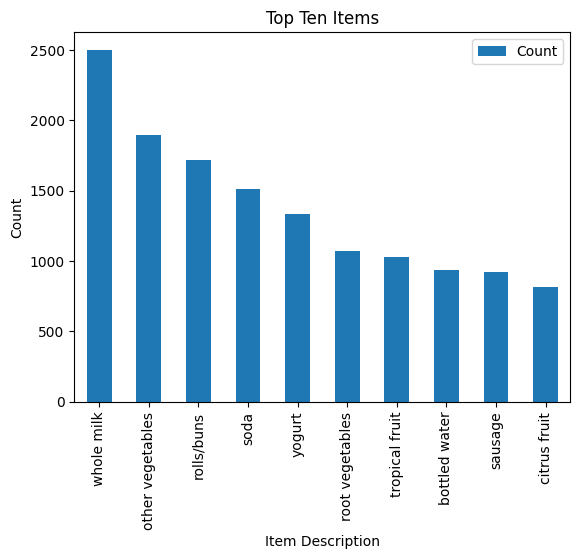

In [13]:
item_count = df.groupby("itemDescription").size().reset_index(name="Count").sort_values(by= "Count", ascending=False).head(10)

item_count.plot(kind="bar", x="itemDescription", y="Count")
plt.title("Distribution of Top Ten Items")
plt.xlabel("Item Description")
plt.ylabel("Count");

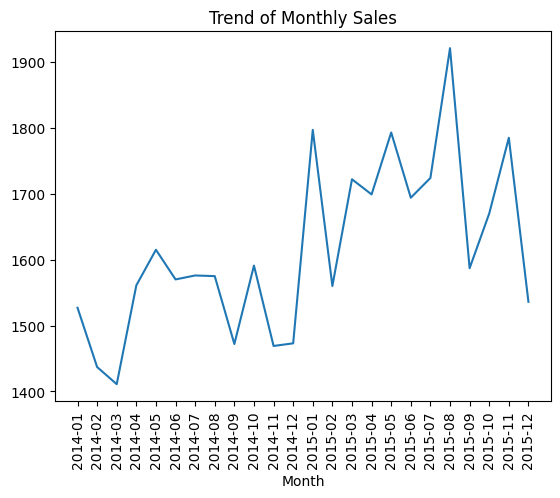

In [36]:
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month").size()

sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=90)
plt.title("Trend of Monthly Sales");

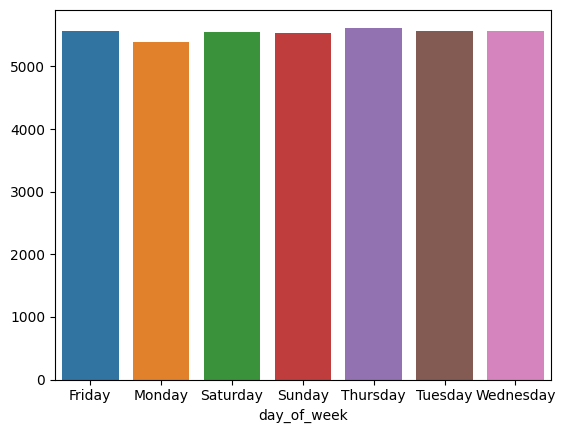

In [39]:
df["day_of_week"] = df["Date"].dt.day_name()
transactions_by_day = df.groupby("day_of_week").size()

sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values)
plt.title("Transaction Distribution by Day of the Week");

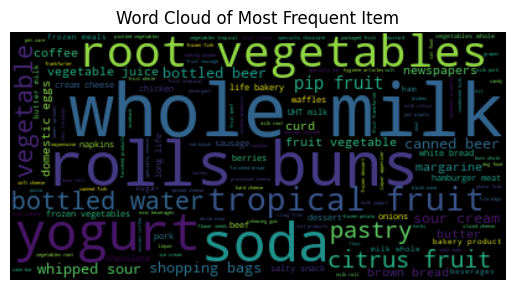

In [43]:
text = " ".join(map(str, df["itemDescription"]))
        
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Item");

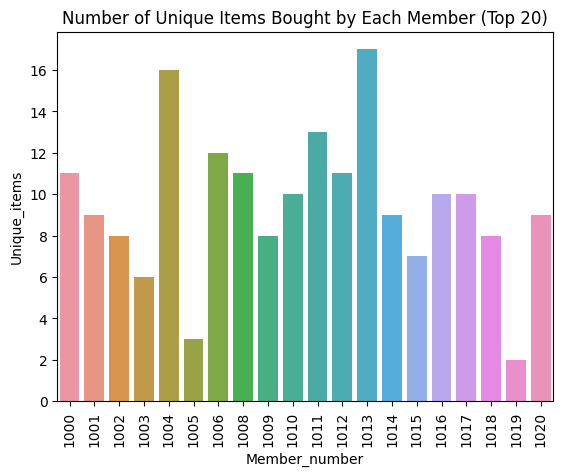

In [67]:
unique_items_by_members = df.groupby("Member_number")["itemDescription"].nunique().reset_index(name="Unique_items").head(20)
sns.barplot(x="Member_number", y= "Unique_items", data=unique_items_by_members)
plt.xticks(rotation=90)
plt.title("Number of Unique Items Bought by Each Member (Top 20)");

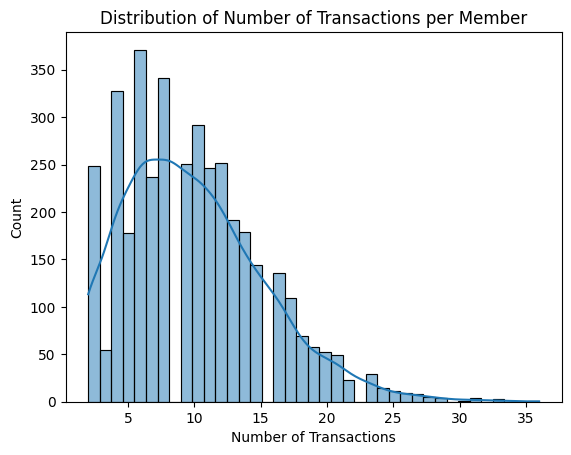

In [66]:
sns.histplot(df["Member_number"].value_counts(), kde=True)
plt.xlabel("Number of Transactions")
plt.title("Distribution of Number of Transactions per Member");